# Multiplex analysis with two indepdent datasets 

### Two independent datasets, one for training and the other for testing. Random forest classifier is implemented; error rates were calculated by oob-score; cross validation by k-fold

In [1]:
%run PR8_function_library.ipynb

In [2]:
#import dataset
global_dir_path = "C://Users/chris/OneDrive/Desktop/MIT postdoc project/ABN project/Influenza/Final_headspace_analysis"
dir_path0 = global_dir_path + '/2023_0819_Breath_PR8_multiplex'
dir_path1 = global_dir_path + '/2023_0916_Breath_PR8_multiplex'

In [3]:
dict_name = {}
dict_name["name0"] = dir_path0 + '/zscore_10min_code.xlsx'
dict_name["name1"] = dir_path1 + '/zscore_10min_code.xlsx'

dict_df = {}
for i in range(0, len(dict_name)):
    dict_df["df"+ str(i)] = pd.read_excel(dict_name["name" + str(i)])

In [4]:
trainset = dict_df['df0']
testset = dict_df['df1']

In [ ]:
#Hyperparameter search by gridsearchcv
param_dist = {'n_estimators' : [100, 300, 500, 1000],
              'max_depth': [1, 2, 3, 4, 5, 6, 8, 10],
              'min_samples_leaf' : [1, 2, 3, 4, 5], 
              'random_state': [0, 42],
              'criterion' : ['gini', 'entropy'],
              'max_features' : ['sqrt', 'log2', 0.2, 0.4, 0.6, 0.8]}

clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, 
                           param_grid = param_dist,
                           cv=3, verbose=1)

In [ ]:
#Gridsearch on the training set of data
grid_search.fit(ns_assign(trainset)[5], class_label(trainset))
best_clf = grid_search.best_estimator_
print('Best hyperparameters:',  grid_search.best_params_)

In [5]:
#classifier where best parameters were found by gridsearchcv
clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini',
                             random_state=0, 
                             max_depth=2,
                             min_samples_leaf=2,
                             max_features=0.2,
                            oob_score = True)

In [6]:
#oob error of the training set
X_train = ns_assign(trainset)
y_train = class_label(trainset)
    
clf.fit(X_train[5], y_train)
oob_error = 1 - clf.oob_score_

print(f'OOB error: {oob_error: .3f}')

OOB error:  0.214


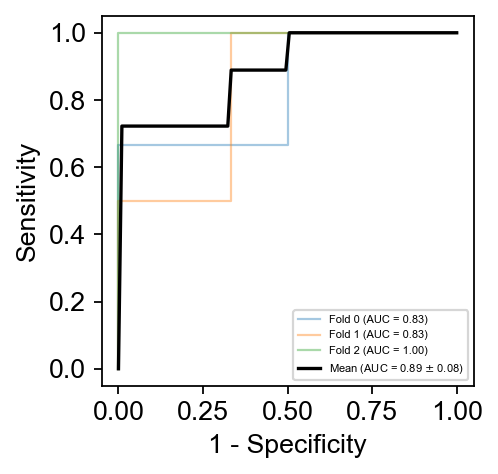

In [7]:
#cross validation by Kfold
cross_val(clf, X_train[5], y_train, 3)

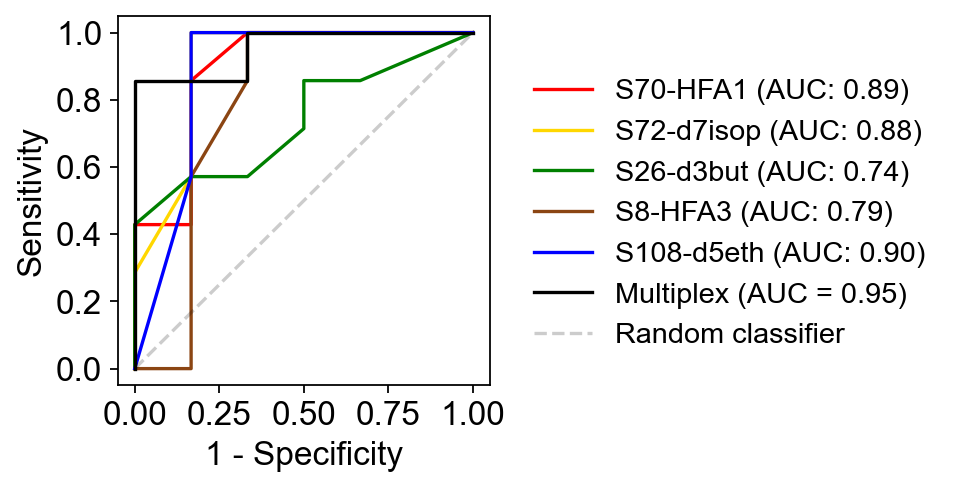

In [8]:
plot_roc_allns(trainset, testset, clf)

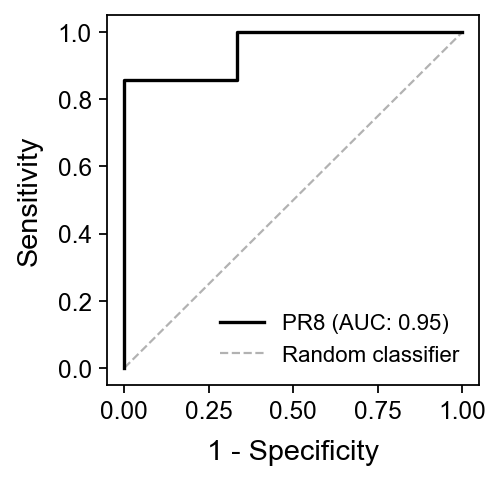

In [9]:
plot_roc_multiplex(trainset, testset, clf)

ACCURACY OF THE MODEL:  0.8461538461538461


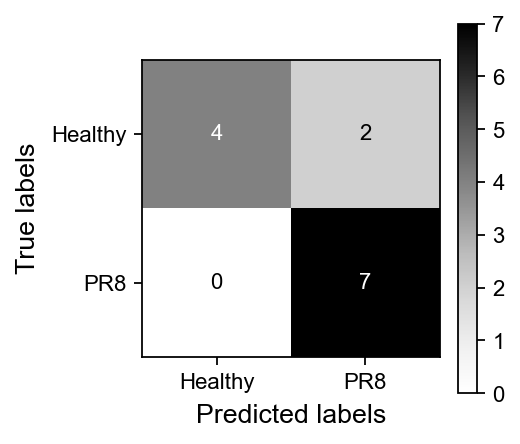

In [10]:
plot_cm(testset)